## Museum of Modern Art (MoMA)

We are going to work with data about the art in the Museum of Modern Art (MoMA). MoMA, a museum in New York City, has one of the largest collections of modern art in the world.

![Image](https://api.time.com/wp-content/uploads/2014/11/moma-then-now.jpg)

MoMA publishes several datasets in their [GitHub](https://github.com/orgs/MuseumofModernArt/repositories) repository. For the purpose of this project, we are using a curated sample size of the dataset down from over 135,000 rows to a more manageable **16,725** rows.

### Opening Data

In [1]:
from csv import reader
from plotly.subplots import make_subplots
import plotly.graph_objects as go
opened_file = open('Raw Data/artworks.csv', encoding="utf8")
read_file = reader(opened_file)
moma = list(read_file)
moma_header = moma[0]
moma = moma[1:]

### Exploring Data

To make it easier to explore the dataset, we'll first write a function named `explore_data ()` that we can use repeatedly to explore rows in a more readable way. We'll also add an option for our function to show the number of rows and columns for any data set.

In [2]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # Adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

In [3]:
# Test print moma dataset
print (moma_header)
print ('\n')
explore_data(moma, 0, 3, True)

['Title', 'Artist', 'Nationality', 'BeginDate', 'EndDate', 'Gender', 'Date', 'Department']


['Dress MacLeod from Tartan Sets', 'Sarah Charlesworth', '(American)', '(1947)', '(2013)', '(Female)', '1986', 'Prints & Illustrated Books']


['Duplicate of plate from folio 11 verso (supplementary suite, plate 4) from ARDICIA', 'Pablo Palazuelo', '(Spanish)', '(1916)', '(2007)', '(Male)', '1978', 'Prints & Illustrated Books']


['Tailpiece (page 55) from SAGESSE', 'Maurice Denis', '(French)', '(1870)', '(1943)', '(Male)', '1889-1911', 'Prints & Illustrated Books']


Number of rows: 16725
Number of columns: 8


### Cleaning Data

#### Part 1: Replacing Unwanted Values

Upon inspection of the sample data above, we have noticed that `Nationality` and `Gender` columns have parentheses `()` at the beginning and the end of the values. Let's remove those values:

In [4]:
# Using str.replace() method to remove '()'
for row in moma:
    nationality = row[2]
    nationality_open = nationality.replace('(', '')
    nationality_clean = nationality_open.replace(')', '')
    row[2] = nationality_clean
    
    gender = row[5]
    gender_open = gender.replace('(', '')
    gender_clean = gender_open.replace(')', '')
    row[5] = gender_clean
    
explore_data(moma, 0, 3, True)

['Dress MacLeod from Tartan Sets', 'Sarah Charlesworth', 'American', '(1947)', '(2013)', 'Female', '1986', 'Prints & Illustrated Books']


['Duplicate of plate from folio 11 verso (supplementary suite, plate 4) from ARDICIA', 'Pablo Palazuelo', 'Spanish', '(1916)', '(2007)', 'Male', '1978', 'Prints & Illustrated Books']


['Tailpiece (page 55) from SAGESSE', 'Maurice Denis', 'French', '(1870)', '(1943)', 'Male', '1889-1911', 'Prints & Illustrated Books']


Number of rows: 16725
Number of columns: 8


#### Part 2: Uniforming Data

We have also noticed that within the `Gender` column, there are inconsistencies of `Male` and `male` values due to manual data entry by various personnel.

Furthermore, we have a number of rows containing an empty value. This could mean the person entering the data didn't know the gender of the artist, or the artist is unknown, or the artist's gender is non-binary. Likewise for the Nationality column.

Since we will be doing multiple calculations later on, it is a good practice to keep our data as consistent as possible. Let's update our data to uniform `male` to `Male`, add `Gender Unknown/Other`, and `Nationality Unknown` to those empty values.   

In [5]:
for row in moma:
    
    #Cleaning up the Gender column
    gender = row[5]
    gender = gender.title() # Using str.title() method to convert lower case to upper case

    if not gender: # If there is no gender, set a value
        gender = 'Gender Unknown/Other'        
    row[5] = gender
    
    
    #Cleaning up the Nationality column
    nationality = row[2]
    nationality = nationality.title() # Using str.title() method to convert lower case to upper case
    
    if not nationality: # If there is no nationality, set a value
        nationality = 'Nationality Unknown'
    row[2] = nationality
    
explore_data(moma, 175, 180, True)

['Ballet poster', 'André Masson', 'French', '(1896)', '(1987)', 'Male', '1933', 'Architecture & Design']


['Fingerprint', 'Robert Watts', 'American', '(1923)', '(1988)', 'Male', '1965', 'Prints & Illustrated Books']


['El Frente Popular de Madrid Al Frente Popular del Mundo - Homenaje a Las Brigadas Internacionales', 'J. Briones', 'Spanish', '', '', 'Gender Unknown/Other', '1936-1937', 'Architecture & Design']


['Untitled from Woodcuts', 'Thomas Schütte', 'German', '(1954)', '', 'Male', '2011', 'Prints & Illustrated Books']


['PSALM 122, plate 27 (page 61) from PSAUMES DE DAVID', 'Marc Chagall', 'French', '(1887)', '(1985)', 'Male', '1978-1979', 'Prints & Illustrated Books']


Number of rows: 16725
Number of columns: 8


#### Part 3: Converting Data

In addition to removing parentheses from the rest of our data, we also want to convert the values at the `BeginDate`, `EndDate`, and `Date` columns from string to integer for future calculations. Moreover, since there are empty values for artist's unknown birth year and death year, we want to leave those empty values as is, not replacing empty cells with string value like 'Unknown Birth/Death Year' that will mixed in with integer, complicating future calculations. 

For the `Date` column, we can see that there are other unwanted characters in addition to parentheses `()` like: `c.`, `C.` indicating the year is approximate, or `'s` indicating the decade. We can combine the steps in **Part 1: Replacing Unwanted Values** with additional list of unwanted characters to remove from our three date columns below:

In [6]:
# Expanding the list of characters to remove using custom function instead of str.replace() method in Part 1
bad_chars = ['(',')','c','C','.',',','s',"'",'"','"',' ']

def strip_characters(string):
    for char in bad_chars:
        string = string.replace(char, '')
    return string

for row in moma:
    begin_date = row[3]
    end_date = row[4]
    raw_date = row[6]
    birth_date = strip_characters(begin_date)
    death_date = strip_characters(end_date)
    art_date = strip_characters(raw_date)
    row[3] = birth_date
    row[4] = death_date
    row[6] = art_date
    
explore_data(moma, 5, 10, True)

['Pictorial ornament (folio 11) from WOODCUTS', 'Antonio Frasconi', 'American', '1919', '2013', 'Male', '1957', 'Prints & Illustrated Books']


["Rue de l'Hôtel-de-Ville", 'Eugène Atget', 'French', '1857', '1927', 'Male', '1924', 'Photography']


['Los Angeles Airport', 'Garry Winogrand', 'American', '1928', '1984', 'Male', '1978-1983', 'Photography']


['Why Defy from Disasters of Peace', 'Diane Victor', 'South African', '1964', '', 'Female', '2001', 'Prints & Illustrated Books']


['STILL WATER AND FISH', 'David Brown Milne', 'Canadian', '1882', '1953', 'Male', '1941', 'Prints & Illustrated Books']


Number of rows: 16725
Number of columns: 8


After cleaning up all the 'bad' characters in our data, in the `Date` column, some entries are in ranges of years (e.g., 1913 -1923) and we need to decide how to proceed. For the purpose of this, we will average the 2 years in the range and convert all year values from string to integer.

In [7]:
# Calculating average for range values
def process_date(date):
    if '-' in date:
        split_date = date.split('-')
        date_one = split_date[0]
        date_two = split_date[1]
        date = round((int(date_one) + int(date_two)) / 2)
    else:
        date = int(float(date))
    return date

# Averaging the years from the Date column into integer
for row in moma: 
    raw_date = row[6]
    art_date = process_date(raw_date)
    row[6] = art_date
    
explore_data(moma, 5, 10, True)

['Pictorial ornament (folio 11) from WOODCUTS', 'Antonio Frasconi', 'American', '1919', '2013', 'Male', 1957, 'Prints & Illustrated Books']


["Rue de l'Hôtel-de-Ville", 'Eugène Atget', 'French', '1857', '1927', 'Male', 1924, 'Photography']


['Los Angeles Airport', 'Garry Winogrand', 'American', '1928', '1984', 'Male', 1980, 'Photography']


['Why Defy from Disasters of Peace', 'Diane Victor', 'South African', '1964', '', 'Female', 2001, 'Prints & Illustrated Books']


['STILL WATER AND FISH', 'David Brown Milne', 'Canadian', '1882', '1953', 'Male', 1941, 'Prints & Illustrated Books']


Number of rows: 16725
Number of columns: 8


Now that we have an average number for the `Date` column instead of a range, we can now finalize all the columns with year values from strings to integers below:

In [8]:
def convert(date):
    if date != '': # Check that we don't have an empty string       
        date = int(float(date))   
    return date

for row in moma:
    begin_date = row[3]
    end_date = row[4]
    raw_date = row[6]
    birth_date = convert(begin_date)
    death_date = convert(end_date)
    art_date = convert(raw_date)
    row[3] = birth_date
    row[4] = death_date
    row[6] = art_date
    
explore_data(moma, 5, 10, True)

['Pictorial ornament (folio 11) from WOODCUTS', 'Antonio Frasconi', 'American', 1919, 2013, 'Male', 1957, 'Prints & Illustrated Books']


["Rue de l'Hôtel-de-Ville", 'Eugène Atget', 'French', 1857, 1927, 'Male', 1924, 'Photography']


['Los Angeles Airport', 'Garry Winogrand', 'American', 1928, 1984, 'Male', 1980, 'Photography']


['Why Defy from Disasters of Peace', 'Diane Victor', 'South African', 1964, '', 'Female', 2001, 'Prints & Illustrated Books']


['STILL WATER AND FISH', 'David Brown Milne', 'Canadian', 1882, 1953, 'Male', 1941, 'Prints & Illustrated Books']


Number of rows: 16725
Number of columns: 8


### Analyzing Data

Working with this MoMA dataset, we want to gain a deeper understanding of the composition of the collection in New York. Some of the questions we want to focus on are:
    
    Calculating the artist's age when they created their artwork
    Analyze and interpret the distribution of artist ages
    Analyze and interpret the distribution of artist gender
    Analyze and interpret the distribution of artist original location

To calculate the artist's age when they created their works of art, we need to subtract the artist's birth year `BeginDate` from the year when they created their artwork `Date`. 

While every row has a value for `Date`, there are some that are missing values for `BeginDate`. When we cleaned `BeginDate`, we encountered some missing values and left them as empty strings (`''`). We'll use a value of 0 for these cases, which we'll replace with something more meaningful later.

![Image](https://raw.githubusercontent.com/nilnic/public_python_projects/37d1b2ae4942f93c6f6fbddf59959a34a558ceb3/age_logic_1.svg)

There are a few cases when the artist's age (according to our data set) is very low, including some where the age is negative. We could investigate these specific cases one by one, but since we're looking for a summary, we'll take care of these by categorizing artists younger than 20 as `"Unknown"`. This has the handy effect of also categorizing the artists without birth years as `"Unknown"`.

![Image](https://raw.githubusercontent.com/nilnic/public_python_projects/37d1b2ae4942f93c6f6fbddf59959a34a558ceb3/age_logic_2.svg)

In [9]:
# Build a list that will store artist's age when they created their artworks
ages = []
for row in moma:
    art_date = row[6]
    birth_date = row[3]
    if type(birth_date) == int: # If birth year is an integer
        age = art_date - birth_date
    else: # If birth year is not an integer (empty)
        age = 0
    ages.append(age)

# A separate list that will store the artist's final age that are above 20 years old    
final_ages = []
for age in ages:
    if age > 20:
        final_age = age
    else:
        final_age = 'Unknown'
    final_ages.append(final_age)

We now have a list — `ages` — containing the artist ages when they created their artwork. Because there are many unique ages, we'll calculate only the decade during which the artist created each work. For instance, if we calculate that the artist was 24, we'll record that as the artist being in their "20s."

In [10]:
# Build a list that will store the artist's decade data
decades = []
for age in final_ages:
    if age == 'Unknown':
        decade = age
    else:
        decade = str(age) # Convert the value from integer to string
        decade = decade[:-1] # String slicing to remove the final character of decade
        decade = decade + '0s' # Add '0s' at the end of decade
    decades.append(decade)

Now with the decade of artist's calculated, we'll generate a frequency table to count the instances of each decade for our data:

In [11]:
# Build a dictionary to store the decade frequency of artists
decade_frequency = {}
for num in decades:
    if num not in decade_frequency:
        decade_frequency[num] = 1
    else:
        decade_frequency[num] += 1
        
print(decade_frequency)

{'30s': 4722, '60s': 1357, '70s': 559, '40s': 4081, '50s': 2434, '20s': 1856, 'Unknown': 1093, '90s': 253, '80s': 364, '100s': 3, '110s': 3}


In addition to calculating the artist's decade, with how vast of a collection from the New York's Museum of Modern Art is, we'll need to calculate how many works of art are in our dataset for each artist.

In [12]:
# Build a dictionary to store the number of arts for each artist
artist_frequency = {}
for row in moma:
    artist = row[1]
    if artist not in artist_frequency:
        artist_frequency[artist] = 1
    else:
        artist_frequency[artist] += 1

print(artist_frequency)

{'Sarah Charlesworth': 1, 'Pablo Palazuelo': 4, 'Maurice Denis': 71, 'Aristide Maillol': 77, 'Eugène Atget': 705, 'Antonio Frasconi': 41, 'Garry Winogrand': 47, 'Diane Victor': 4, 'David Brown Milne': 2, 'Jean Dubuffet': 206, 'Jim Dine': 57, 'František Kupka': 37, 'Franklin Chenault Watkins': 4, 'Christopher Wool': 19, 'Abraham Walkowitz': 19, 'Pierre Alechinsky': 67, 'Frank Stella': 17, 'Frank Lloyd Wright': 112, 'Vicente Rojo': 5, 'Ludwig Mies van der Rohe': 318, 'Varvara Stepanova': 6, 'Richard Serra': 4, 'Robert Filliou': 15, 'Roger Chancel': 3, 'Pierre Bonnard': 129, 'Jacqueline Poncelet': 1, 'Émile Bernard': 83, 'Georg Baselitz': 14, 'Frans Masereel': 34, 'Unknown': 448, 'Sol LeWitt': 89, 'James Tenney': 1, 'Claes Oldenburg': 12, 'Dieter Roth': 18, 'Moisei Fradkin': 1, 'Richard Lindner': 1, 'Wojciech Prazmowski': 2, 'Thomas Bewick': 49, 'Spencer Sweeney': 2, 'Batiste Madalena': 5, 'On Kawara': 9, 'Andy Warhol': 41, 'Lee Friedlander': 180, 'Joan Miró': 78, 'Marc Chagall': 173, 'Ro

With the same method, we can also create a frequency table of the different genders in our dataset. On top of that, we'll create a template to describe the gender breakdowns for readability since there are only a couple of options.  

In [13]:
# Build a dictionary to store genders of artists
gender_frequency = {}
for row in moma:
    gender = row[5]
    if gender not in gender_frequency:
        gender_frequency[gender] = 1
    else:
        gender_frequency[gender] += 1

for gender, ct in gender_frequency.items():
    template = 'There are {ct:,} artworks by {gender} artists'.format(ct = ct, gender = gender)
    print(template)

There are 2,443 artworks by Female artists
There are 13,491 artworks by Male artists
There are 791 artworks by Gender Unknown/Other artists


Lastly, let's create a frequency table of the artists' nationality:

In [14]:
# Build a dictionary to store all artists' nationality
location_frequency = {}
for row in moma:
    location = row[2]
    if location not in location_frequency:
        location_frequency[location] = 1
    else:
        location_frequency[location] += 1
        
print(location_frequency)

{'American': 7444, 'Spanish': 343, 'French': 3042, 'South African': 45, 'Canadian': 113, 'Czech': 115, 'Belgian': 190, 'Russian': 274, 'British': 748, 'German': 1141, 'Nationality Unknown': 627, 'Swiss': 270, 'Polish': 79, 'Japanese': 299, 'Portuguese': 27, 'Austrian': 100, 'Australian': 46, 'Italian': 405, 'Chilean': 77, 'Colombian': 107, 'Mexican': 169, 'Brazilian': 102, 'Dutch': 203, 'Romanian': 10, 'Venezuelan': 57, 'Korean': 17, 'Israeli': 52, 'Argentine': 82, 'Indian': 34, 'Swedish': 32, 'Yugoslav': 15, 'Cuban': 36, 'Various': 70, 'Luxembourgish': 5, 'Croatian': 27, 'Bulgarian': 2, 'Hungarian': 24, 'Georgian': 6, 'Puerto Rican': 1, 'Danish': 67, 'Serbian': 1, 'Pakistani': 5, 'Ecuadorian': 3, 'Chinese': 26, 'Iranian': 4, 'Finnish': 32, 'Lebanese': 1, 'Thai': 5, 'Cambodian': 1, 'Scottish': 16, 'Kenyan': 1, 'Latvian': 5, 'Sudanese': 3, 'Uruguayan': 8, 'Peruvian': 15, 'New Zealander': 3, 'Moroccan': 2, 'Guatemalan': 11, 'Cameroonian': 3, 'Egyptian': 5, 'Nigerian': 2, 'Icelandic': 2, 

### Visualizing Data

Let's dive deeper and take a look at our distribution of various columns using a bar graph and a pie chart with a function that can help us quickly visualize the table and results.

In [15]:
# One function to generate frequency tables that show percentages
def freq_table(dataset, index):
    result = {}
    
    for row in dataset:
        value = row[index]
        
        if value in result:
            result[value] +=1
        else:
            result[value] = 1
        
    total = sum(result.values())    
    
    for item in result:
        result[item]/=total # Obtain a fraction of the total
        result[item]*=100   # Convert the fraction to a percentage
        result[item] = round(result[item], 2)
        
    return result

In [16]:
# Another function we can use to display the percentages in a descending order
def display_table(dataset, index=None):
    
    if isinstance(dataset, list): # If the dataset is a list of lists compute the required frequency first
        dictionary = freq_table(dataset, index)
    else:
        dictionary = dataset # Else treat the dataset as a dictionary
    
    result = []
    for key, value in dictionary.items():
        result.append((value, key)) # Appends a ('value','key') tuple into results
    
    result = sorted(result, reverse=True) # Sort the resulting list in descending order
    for item in result:
        print(item[-1], ': ' , item[0])
    
    return result

In [17]:
# A function that can help us quickly visualize the table and results from the previous functions in a single call
def show_visuals(dataset, index=None, title_a='', title_b = '', main_title='', y_label=''):
    
    '''computes analysis tables, then displays Bar and Pie charts obtained from analysis of the dataset'''

    # Store the resulting list from calling the display_table function
    item = display_table(dataset, index) 

    # Convert the list to a dictionary
    item = dict(item)

    # Assign chart coordinates from the dictionary values
    y_value = list(item.keys()) 
    x_value = list(item.values())
    
    # Create a Bar and Pie chart using assigned coordinates
    fig = make_subplots(rows=1, cols=2,
                       specs=[[{"type": "xy"}, {"type": "domain"}]],
                       subplot_titles=(title_a, title_b))
    
    fig.add_trace(go.Bar(x=x_value[:5],
                         y=y_value[:5],
                         text=y_value,
                         textposition='outside',
                        showlegend=False),row=1,col=1)
    
    fig.update_yaxes(title_text=y_label, showticklabels=False, row=1, col=1)
    
    fig.add_trace(go.Pie(labels=x_value,
                         values =y_value,
                        textposition='inside',
                        textinfo='percent+label'), row=1,col=2)
    
    fig.update_layout(template = 'plotly_white', title_text= main_title)
    
    fig.show('png', width='950')

Now that we have the function ready, let's visually explore various collumns within our dataset:

**1) Distribution of Decade (Age) of the Artists When They Created Their Work of Arts:** 

30s :  4722
40s :  4081
50s :  2434
20s :  1856
60s :  1357
Unknown :  1093
70s :  559
80s :  364
90s :  253
110s :  3
100s :  3


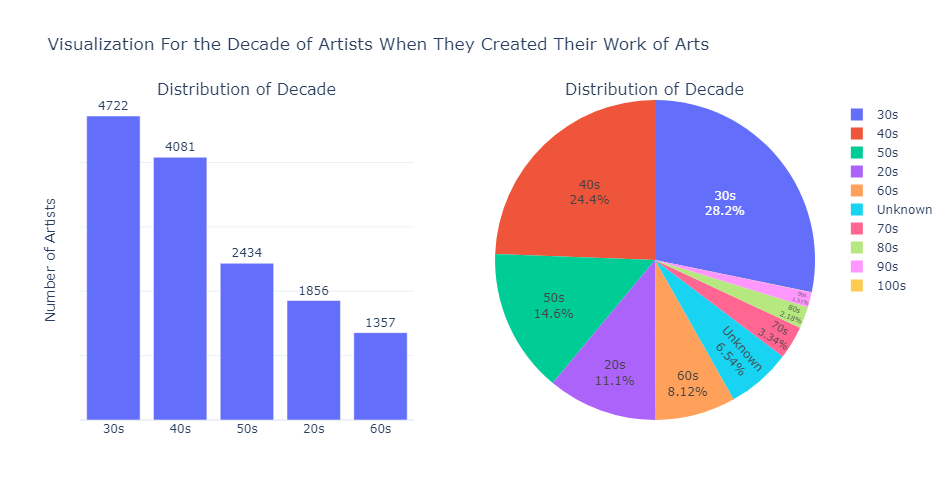

In [18]:
# Explore visual data on the decade when artists created their work of arts (row index = 1) 
show_visuals(decade_frequency, 1, 'Distribution of Decade', 'Distribution of Decade', 'Visualization For the Decade of Artists When They Created Their Work of Arts ', 'Number of Artists' )

**2) Distribution of Gender:**

Male :  80.66
Female :  14.61
Gender Unknown/Other :  4.73


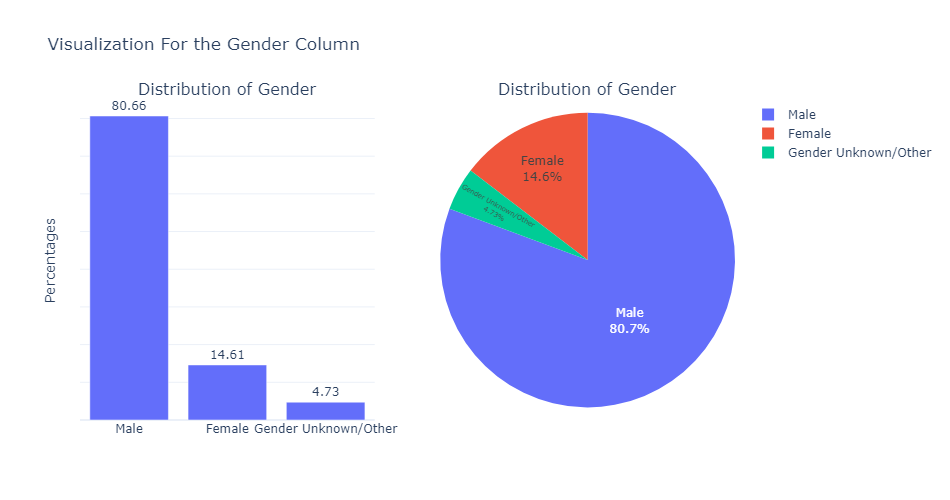

In [19]:
# Explore visual data on gender (row index = 5) 
show_visuals(moma, 5, 'Distribution of Gender', 'Distribution of Gender', 'Visualization For the Gender Column', 'Percentages' )

**3) Artists' Nationality:**

American :  44.51
French :  18.19
German :  6.82
British :  4.47
Nationality Unknown :  3.75
Italian :  2.42
Spanish :  2.05
Japanese :  1.79
Russian :  1.64
Swiss :  1.61
Dutch :  1.21
Belgian :  1.14
Mexican :  1.01
Czech :  0.69
Canadian :  0.68
Colombian :  0.64
Brazilian :  0.61
Austrian :  0.6
Argentine :  0.49
Polish :  0.47
Chilean :  0.46
Various :  0.42
Danish :  0.4
Venezuelan :  0.34
Israeli :  0.31
Australian :  0.28
South African :  0.27
Cuban :  0.22
Indian :  0.2
Swedish :  0.19
Finnish :  0.19
Portuguese :  0.16
Croatian :  0.16
Chinese :  0.16
Hungarian :  0.14
Scottish :  0.1
Korean :  0.1
Yugoslav :  0.09
Peruvian :  0.09
Norwegian :  0.08
Guatemalan :  0.07
Romanian :  0.06
Uruguayan :  0.05
Costa Rican :  0.05
Irish :  0.04
Greek :  0.04
Georgian :  0.04
Ukrainian :  0.03
Turkish :  0.03
Thai :  0.03
Pakistani :  0.03
Luxembourgish :  0.03
Latvian :  0.03
Egyptian :  0.03
Zimbabwean :  0.02
Sudanese :  0.02
New Zealander :  0.02
Iranian :  0.02
Haitian :  0.02
Ecu

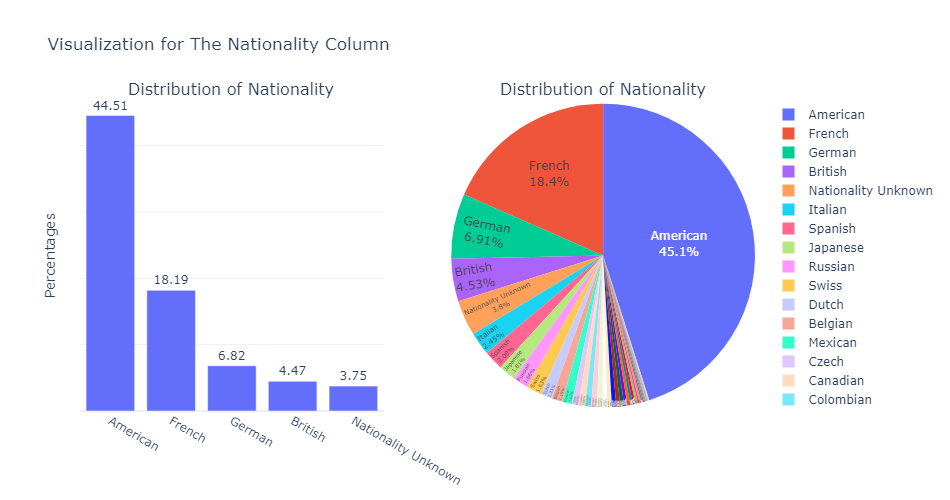

In [20]:
# Explore visual data on nationality (row index = 2) 
show_visuals(moma, 2, 'Distribution of Nationality', 'Distribution of Nationality', 'Visualization for The Nationality Column', 'Percentages' )

### Conclusion

With the immense collection of the Museum of Modern Arts in New York location, we used a sample size of 16,725 rows out of 135,000+ to answer various questions about the data. Throughout this journey, we have accounted for data inconsistencies and potential gaps due to human errors when manually entering or unknown facts about the artists. Furthermore, we have incorporated visual aspects to provide answers at a glance when the numbers get overwhelming. This project is a wrap for now and onward to more journeys!